In [1]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from functions.data_visualization import *
from functions.model_saving_loading import *
from functions.aws import download_directory_with_progress

In [2]:
%store -r RES 
%store -r WIDTH
%store -r HEIGHT
%store -r N_BANDS
%store -r N_CAT
%store -r TRAINING_YEARS 
%store -r TRAINING_SEASONS
%store -r MSK_PATH
%store -r MASK_FILE
%store -r MSK_RAW_PTH 
%store -r MSK_CLIP_PTH 
%store -r MAPPED_MSK_CLIP_PTH 
%store -r MSK_TILES_PTH
%store -r CLN_MSK_TILES_PTH
%store -r IMG_18_PATH 
%store -r IMG_18_FILE 
%store -r IMG_18_COMP_PTH 
%store -r IMG_18_CLIP_PTH 
%store -r IMG_18_NORM_PTH 
%store -r IMG_18_TILES_PTH 
%store -r CLN_IMG_18_TILES_PTH
%store -r IMG_19_PATH
%store -r IMG_19_FILE 
%store -r IMG_19_COMP_PTH
%store -r IMG_19_CLIP_PTH
%store -r IMG_19_NORM_PTH 
%store -r IMG_19_TILES_PTH
%store -r CLN_IMG_19_TILES_PTH 
%store -r MODELS_DIR 
%store -r TRAIN_SPLIT
%store -r TEST_SPLIT
%store -r DATASETS_DIR
%store -r MODELS_TO_LOAD_DIR 
%store -r INFERENCE_INPUT_DIR
%store -r TILE_SIZE
%store -r N_CLASSES
%store -r lgnd

RES = RES
WIDTH = WIDTH
HEIGHT = HEIGHT
N_BANDS = N_BANDS
N_CAT = N_CAT
TRAINING_YEARS = TRAINING_YEARS
TRAINING_SEASONS = TRAINING_SEASONS
MSK_PATH = MSK_PATH
MASK_FILE = MASK_FILE
MSK_RAW_PTH = MSK_RAW_PTH
MSK_CLIP_PTH = MSK_CLIP_PTH
MAPPED_MSK_CLIP_PTH = MAPPED_MSK_CLIP_PTH
MSK_TILES_PTH = MSK_TILES_PTH
CLN_MSK_TILES_PTH = CLN_MSK_TILES_PTH
IMG_18_PATH = IMG_18_PATH
IMG_18_FILE = IMG_18_FILE
IMG_18_COMP_PTH = IMG_18_COMP_PTH
IMG_18_CLIP_PTH = IMG_18_CLIP_PTH
IMG_18_NORM_PTH = IMG_18_NORM_PTH
IMG_18_TILES_PTH = IMG_18_TILES_PTH
CLN_IMG_18_TILES_PTH = CLN_IMG_18_TILES_PTH
IMG_19_PATH = IMG_19_PATH
IMG_19_FILE = IMG_19_FILE
IMG_19_COMP_PTH = IMG_19_COMP_PTH
IMG_19_CLIP_PTH = IMG_19_CLIP_PTH
IMG_19_NORM_PTH = IMG_19_NORM_PTH
IMG_19_TILES_PTH = IMG_19_TILES_PTH
CLN_IMG_19_TILES_PTH = CLN_IMG_19_TILES_PTH
MODELS_DIR = MODELS_DIR
TRAIN_SPLIT = TRAIN_SPLIT
TEST_SPLIT = TEST_SPLIT
DATASETS_DIR = DATASETS_DIR
MODELS_TO_LOAD_DIR = MODELS_TO_LOAD_DIR
INFERENCE_INPUT_DIR = INFERENCE_INPUT_DIR
TILE_SIZE = TILE_SIZE
N_CLASSES = N_CLASSES
lgnd = lgnd

# Optional: run the following cell to download the tf datasets from S3

In [3]:
bucket_name = 'tfrecords'
s3_directory = 'segmentation/lulc/tf_records_5_cat_eb/Y18_19-128px-28_09_2023-18h_15m/'
DATASETS_DIR = s3_directory

In [ ]:
download_directory_with_progress(s3_directory, bucket_name)

In [5]:
processed_image_ds_train = tf.data.Dataset.load(os.path.join(DATASETS_DIR, "processed_image_ds_train"))
processed_image_ds_val = tf.data.Dataset.load(os.path.join(DATASETS_DIR, "processed_image_ds_val"))
processed_image_ds_test = tf.data.Dataset.load(os.path.join(DATASETS_DIR, "processed_image_ds_test"))

2023-10-13 18:26:05.227870: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-10-13 18:26:05.227898: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2023-10-13 18:26:05.227909: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2023-10-13 18:26:05.227949: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-13 18:26:05.227967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
loaded_models = load_models_from_directory(MODELS_TO_LOAD_DIR)

Models IDs:
model_26_09_2023-03h_53m_42s: 1
model_26_09_2023-08h_27m_24s: 2
model_26_09_2023-06h_45m_51s: 3
model_26_09_2023-00h_50m_37s: 4
model_26_09_2023-05h_50m_58s: 5
model_26_09_2023-04h_05m_40s: 6
model_26_09_2023-08h_07m_17s: 7
model_26_09_2023-04h_43m_18s: 8
model_26_09_2023-02h_05m_57s: 9
model_25_09_2023-23h_31m_52s: 10
------------------------------------------
╒══════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Model                │ 1                   │ 2                   │ 3                   │ 4                   │ 5                   │ 6                   │ 7                   │ 8                   │ 9                   │ 10                  │
├──────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼

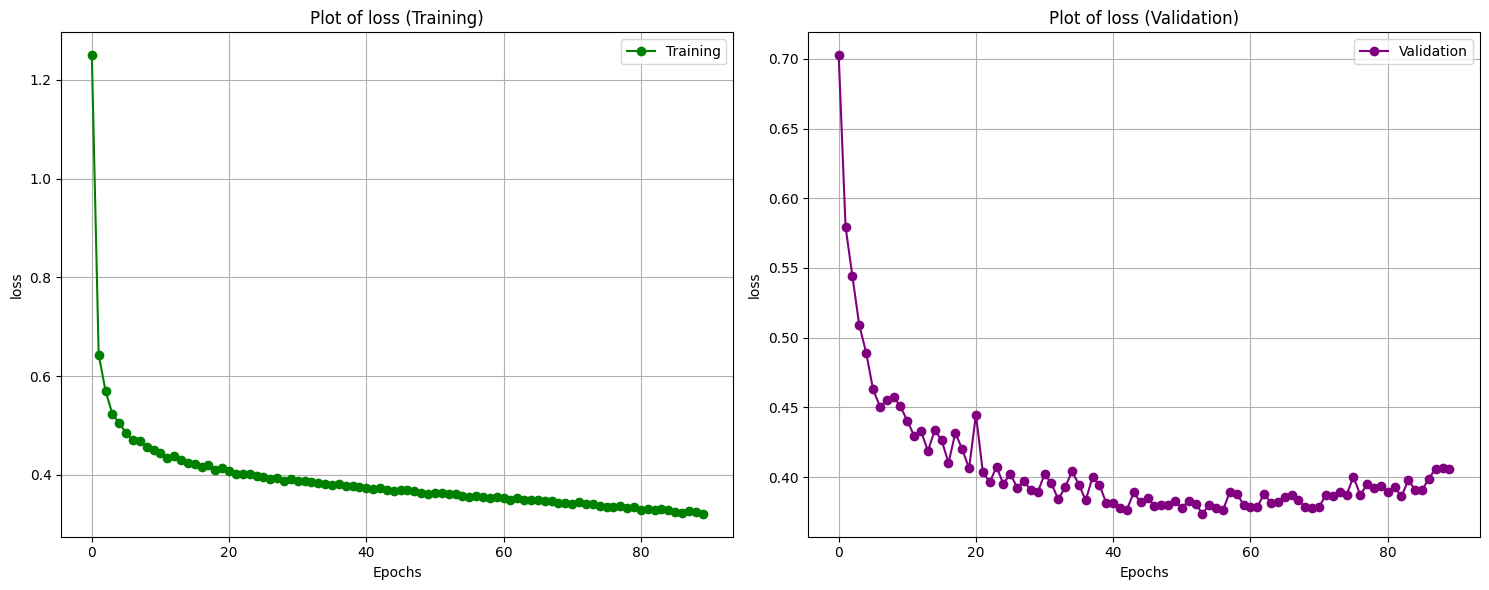

Model: model_26_09_2023-08h_27m_24s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.98%
Validation Dataset Loss: 0.3931
Validation Dataset Accuracy: 85.98%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    174839 │     12487 │       239 │     22466 │     38969 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      2195 │    660838 │        11 │      9423 │    119175 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       291 │        28 │      7734 │      4570 │      1109 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     20806 │     11587 │       814 │   1448045 

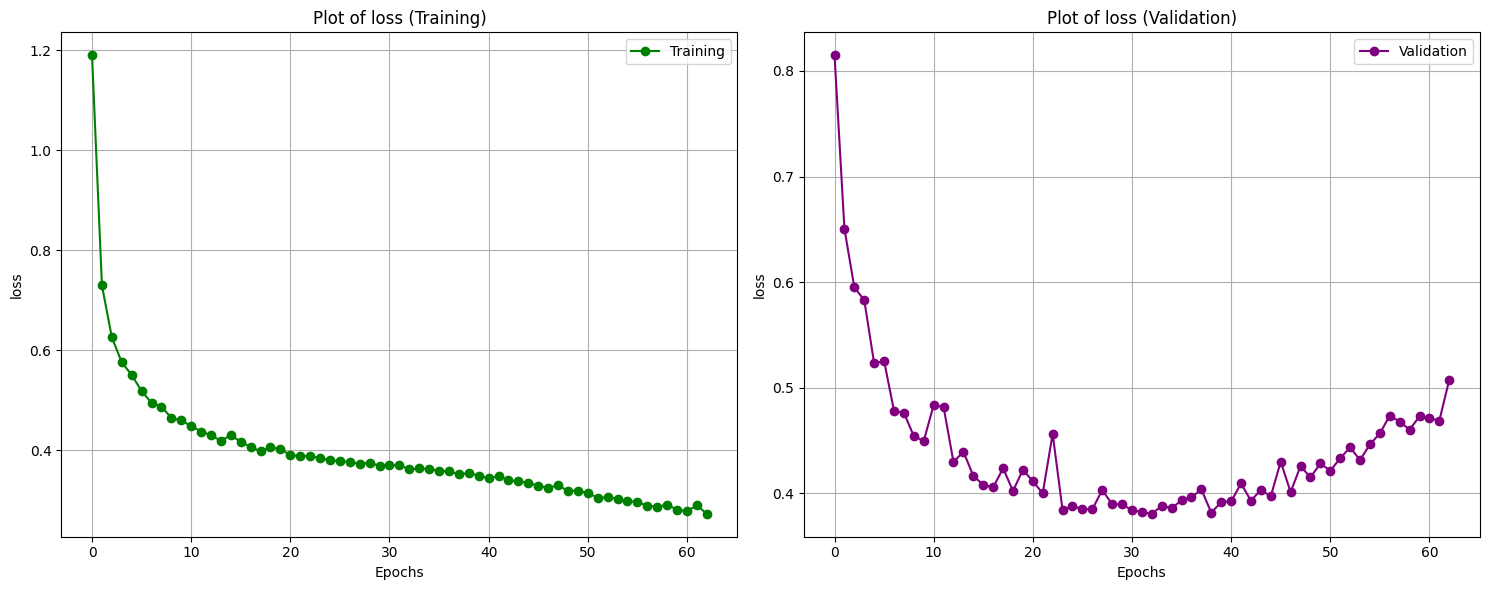

Model: model_26_09_2023-06h_45m_51s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.91%
Validation Dataset Loss: 0.4484
Validation Dataset Accuracy: 85.95%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    184915 │     13107 │       110 │     23716 │     27152 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      3188 │    657180 │         0 │     10858 │    120416 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       396 │        17 │      7540 │      4608 │      1171 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     26677 │     11136 │       815 │   1456899 

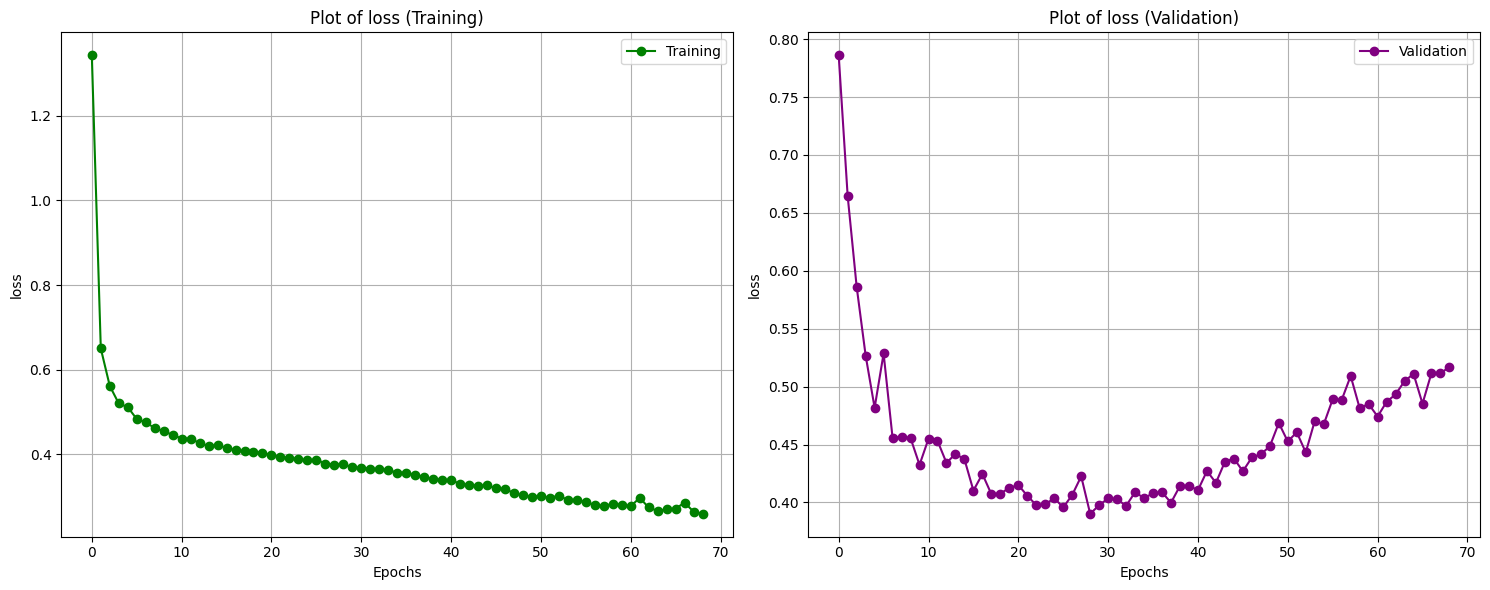

Model: model_26_09_2023-00h_50m_37s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.86%
Validation Dataset Loss: 0.3887
Validation Dataset Accuracy: 85.66%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    185938 │     13611 │       215 │     24168 │     25068 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      3165 │    649249 │         4 │     11846 │    127378 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       358 │        34 │      7935 │      4391 │      1014 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     26973 │     11797 │      1106 │   1454075 

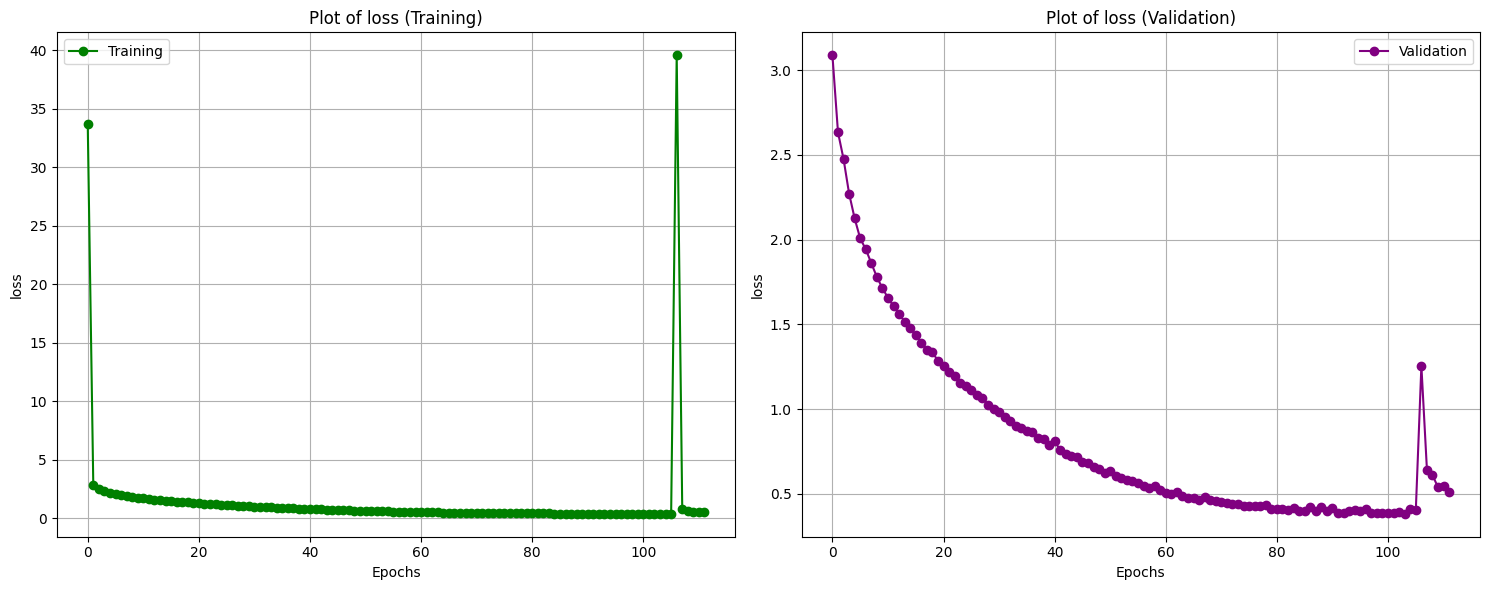

Model: model_26_09_2023-05h_50m_58s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.71%
Validation Dataset Loss: 0.3952
Validation Dataset Accuracy: 85.75%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    184829 │     13660 │       241 │     23161 │     27109 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      3058 │    652708 │         6 │     10013 │    125857 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       368 │        22 │      7754 │      4467 │      1121 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     27981 │     13408 │       960 │   1443476 

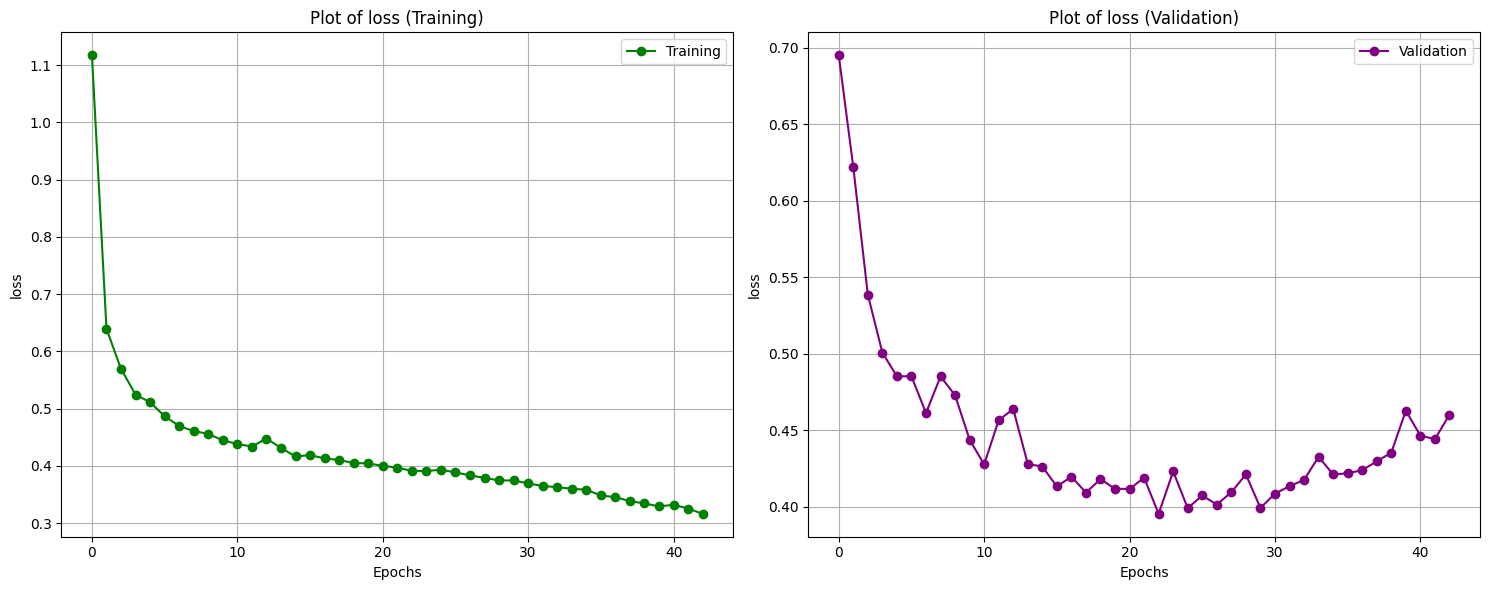

Model: model_26_09_2023-04h_05m_40s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.66%
Validation Dataset Loss: 0.4556
Validation Dataset Accuracy: 85.61%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    184541 │     15939 │       116 │     22906 │     25498 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      1989 │    663880 │         4 │      9226 │    116543 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       406 │        76 │      7627 │      4563 │      1060 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     28041 │     16503 │       882 │   1446301 

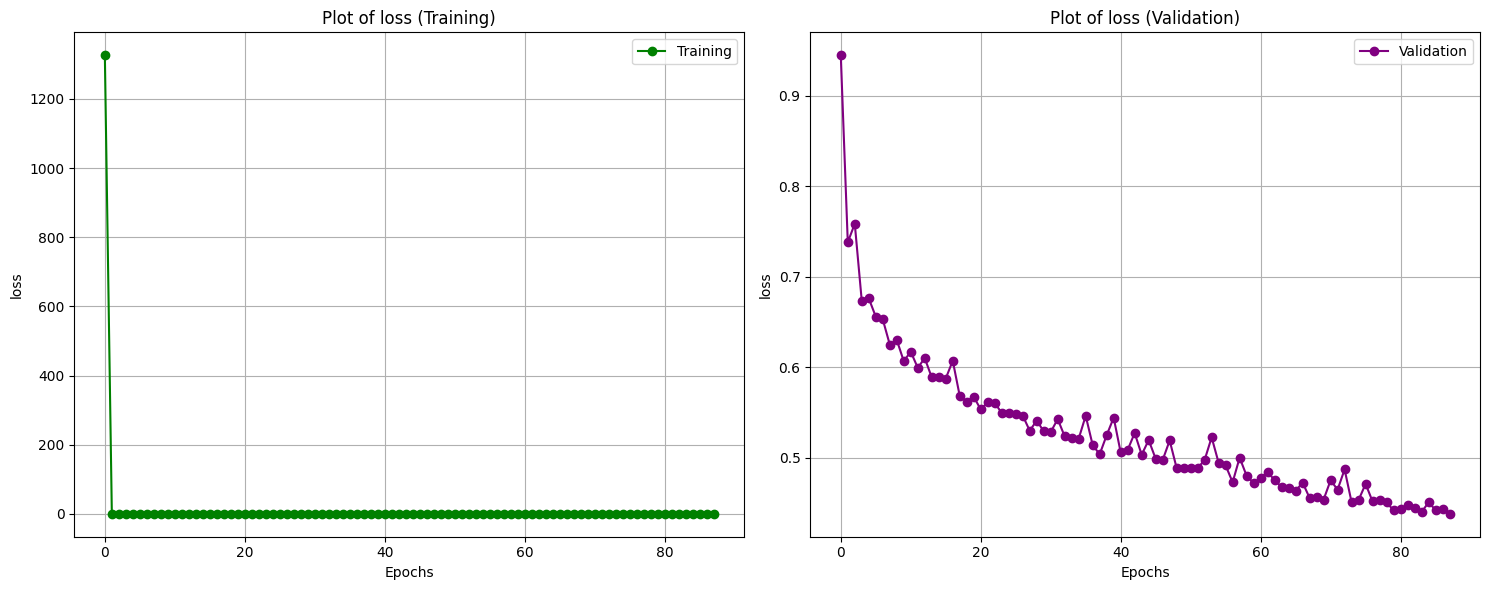

Model: model_26_09_2023-08h_07m_17s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.50%
Validation Dataset Loss: 0.4128
Validation Dataset Accuracy: 85.66%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    179339 │     15602 │       149 │     24087 │     29823 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      2248 │    672442 │         0 │      9266 │    107686 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       398 │        46 │      7358 │      4792 │      1138 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     24143 │     15713 │       650 │   1442232 

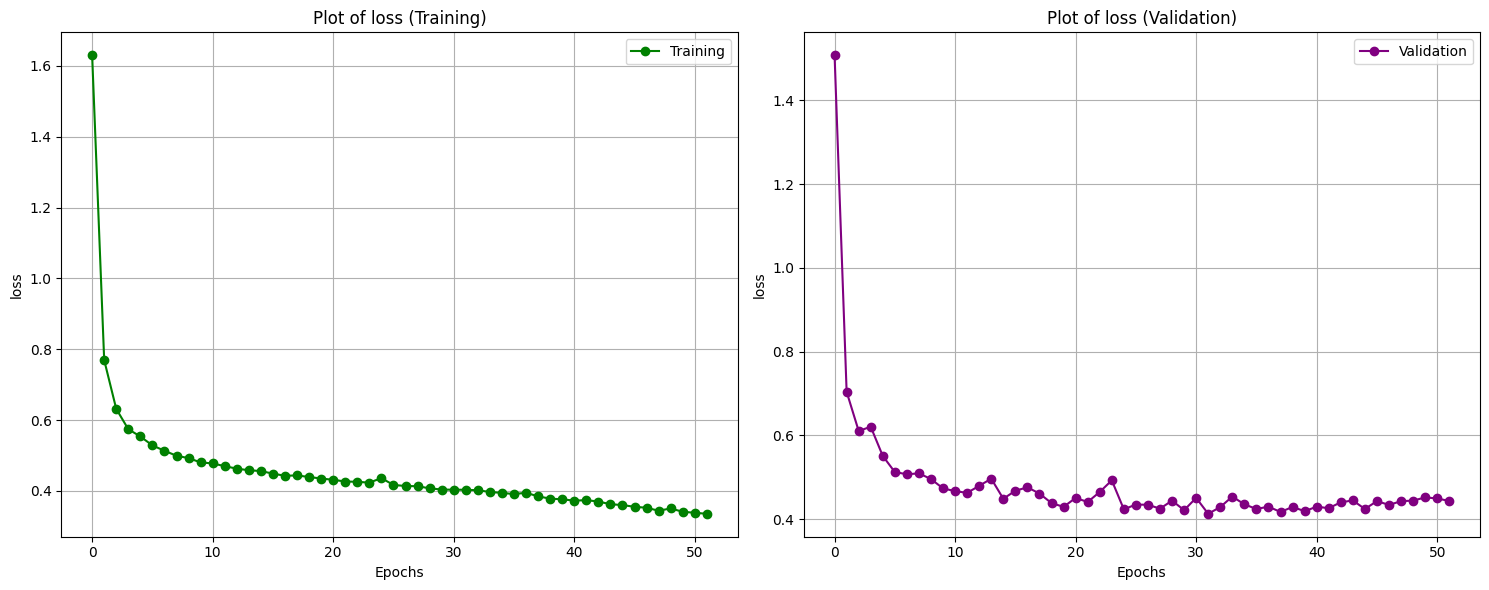

Model: model_26_09_2023-04h_43m_18s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 79.02%
Validation Dataset Loss: 0.4200
Validation Dataset Accuracy: 85.32%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    178049 │     15132 │       118 │     21424 │     34277 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      2069 │    646401 │         0 │     11097 │    132075 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       422 │        21 │      7162 │      4673 │      1454 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     24313 │     13955 │       669 │   1438014 

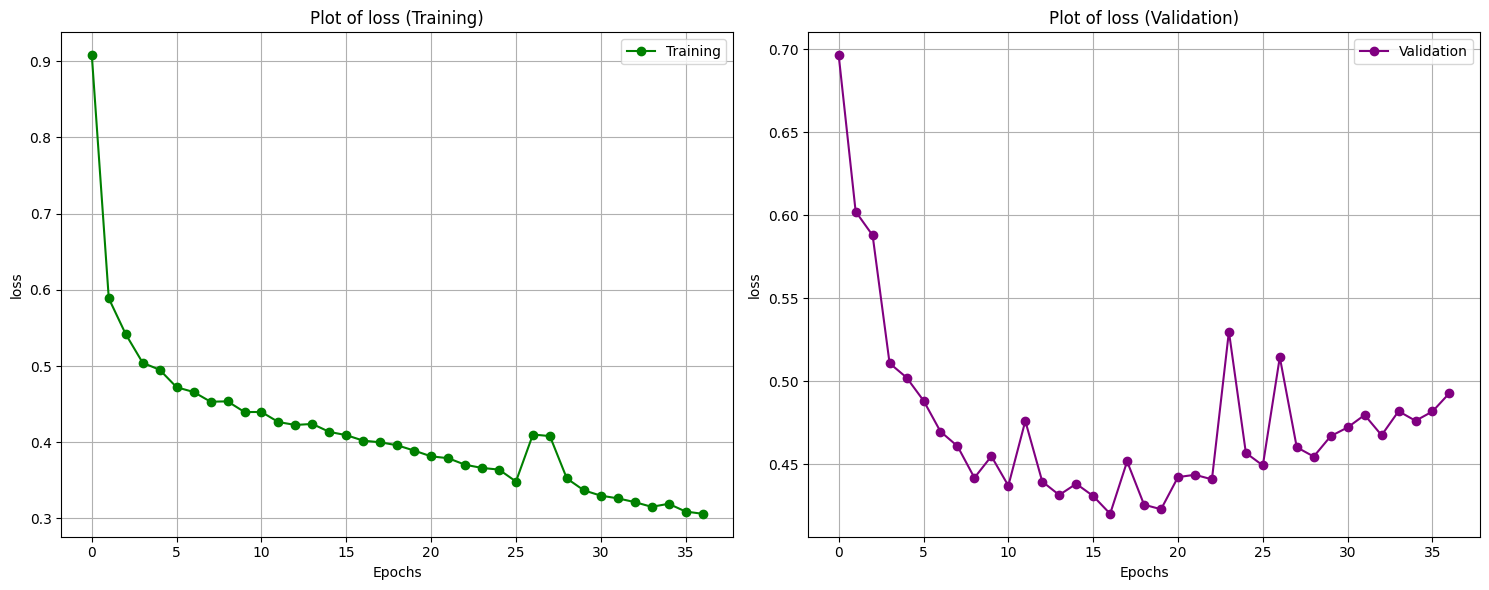

Model: model_26_09_2023-02h_05m_57s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 77.87%
Validation Dataset Loss: 0.9809
Validation Dataset Accuracy: 84.57%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    177015 │     14851 │        98 │     21841 │     35195 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      2767 │    609136 │         0 │      8672 │    171067 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       514 │        34 │      6842 │      4604 │      1738 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     23638 │     16046 │       578 │   1411353 

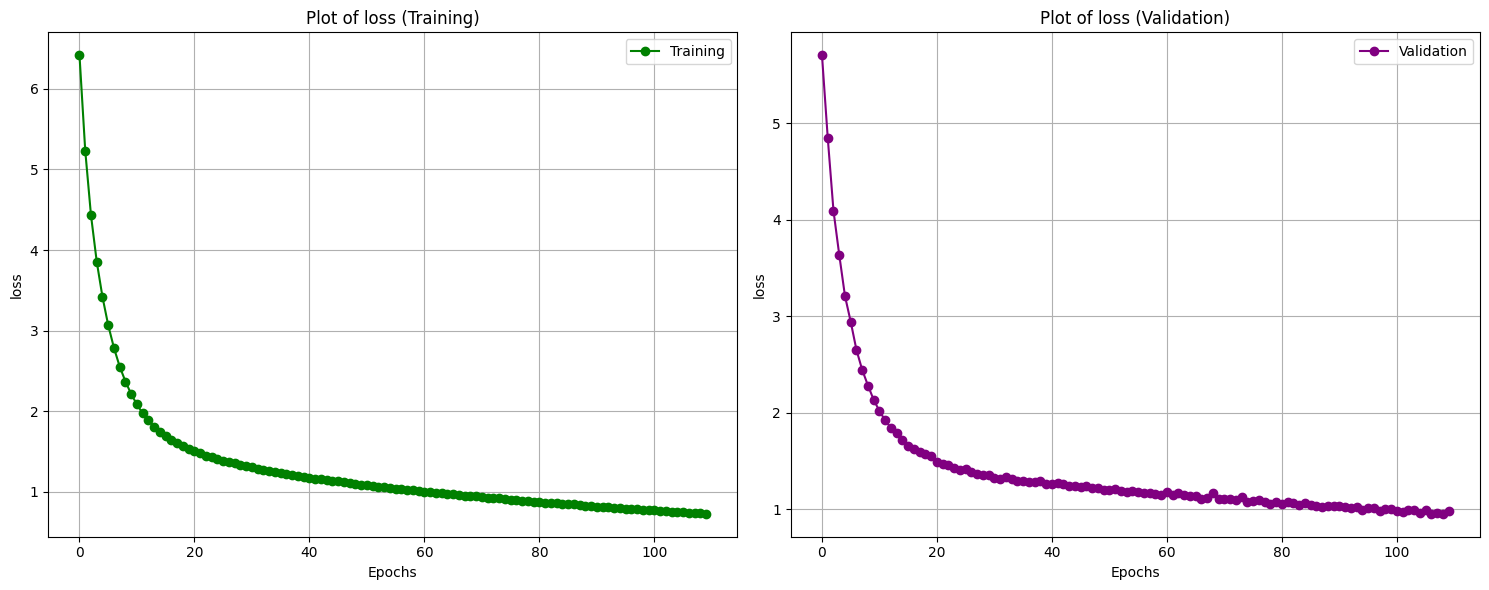

Model: model_25_09_2023-23h_31m_52s
------------------------------------------
Overall Metrics:
Average F1 Score (Val Dataset): 77.76%
Validation Dataset Loss: 0.8449
Validation Dataset Accuracy: 84.32%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    180743 │     15304 │        72 │     23956 │     28925 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 2 │      3893 │    622478 │         0 │     16855 │    148416 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 3 │       614 │        35 │      6667 │      5082 │      1334 │
├─────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ Class 4 │     25312 │     14023 │       522 │   1445681 

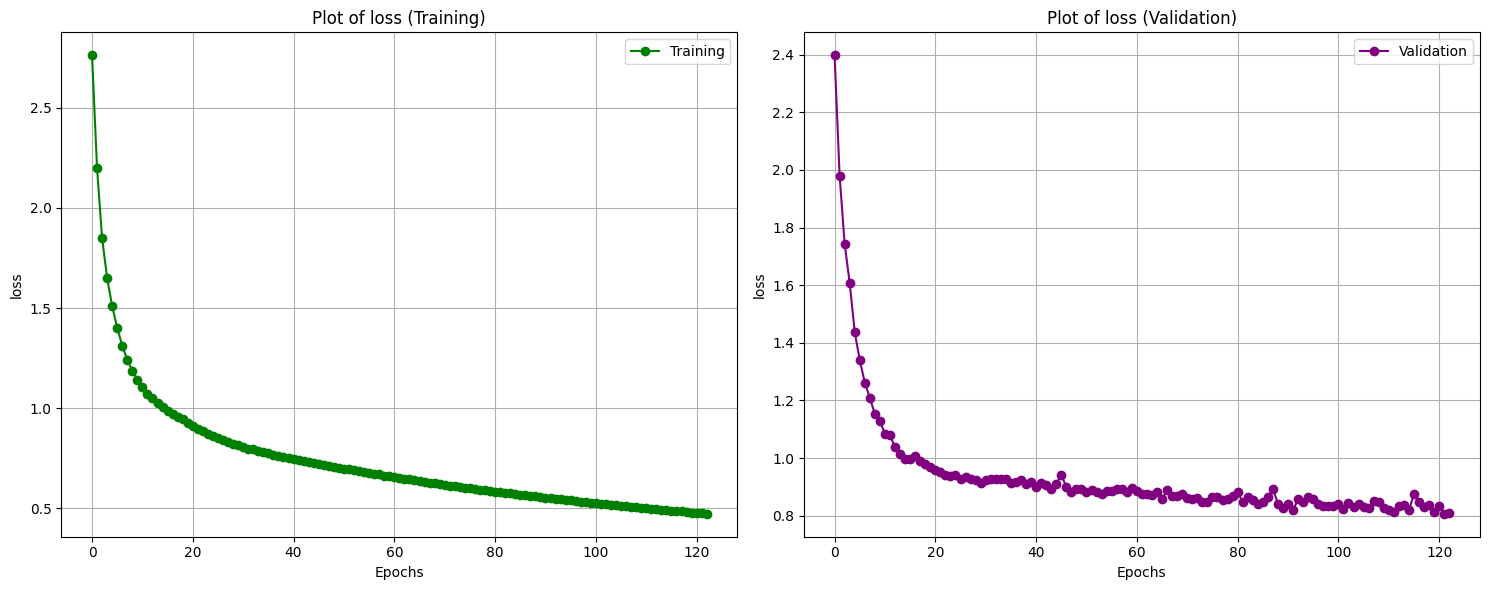

------------------------------------------------------------------------------------------------------------------------------
Best Average F1: 80.30%
Model: model_26_09_2023-03h_53m_42s


In [7]:
best_model = report(loaded_models, print_loss=True, print_accuracy=False, start = 0, print_params=False, params_comp= True)
# if the output is not properly formatted in VS Code, go to settings -> output -> notebook -> word wrap -> disable 

Model: model_26_09_2023-03h_53m_42s
------------------------------------------
buffer_size: 250
batch_size: 12
learning_rate: 0.00044624433459044703
dropout_prob: 0.03419229081463136
n_filters: 68
w_decay: 0.0002498193185950672
epochs: 129
early_stop_patience: 20
early_stop_min_delta: 0.0001
n_blocks: 5
drop_multiplier: [0, 0, 0.5, 1, 1.5]
weight_multiplier: [0, 1, 1, 1, 1]
filter_growth: 2
------------------------------------------
Overall Metrics:
Average F1 Score (Validation Dataset): 80.30%
Validation Dataset Loss: 0.3779
Validation Dataset Accuracy: 86.28%
------------------------------------------
Confusion Matrix & Scores (Validation Dataset):
╒═════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│         │   Class 1 │   Class 2 │   Class 3 │   Class 4 │   Class 5 │
╞═════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Class 1 │    185874 │     13112 │       176 │     23505 │     26333 │
├─────────┼───────────┼───────────┼───────────┼──────

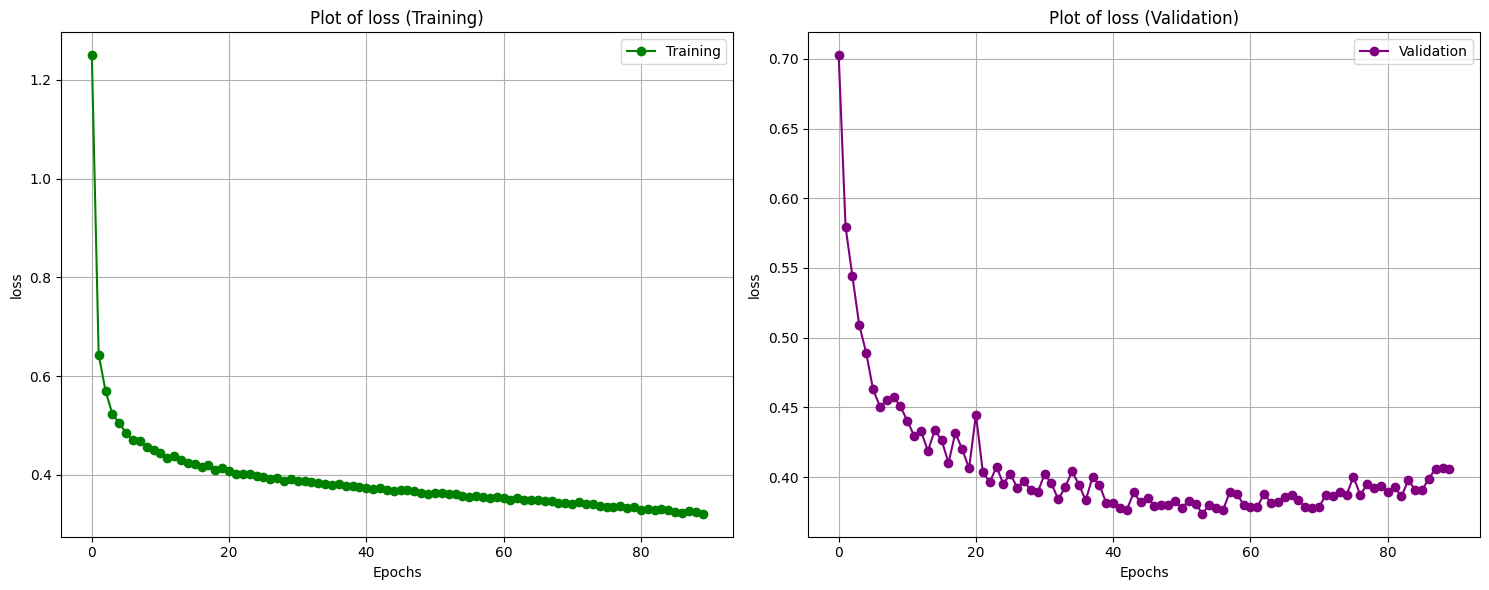

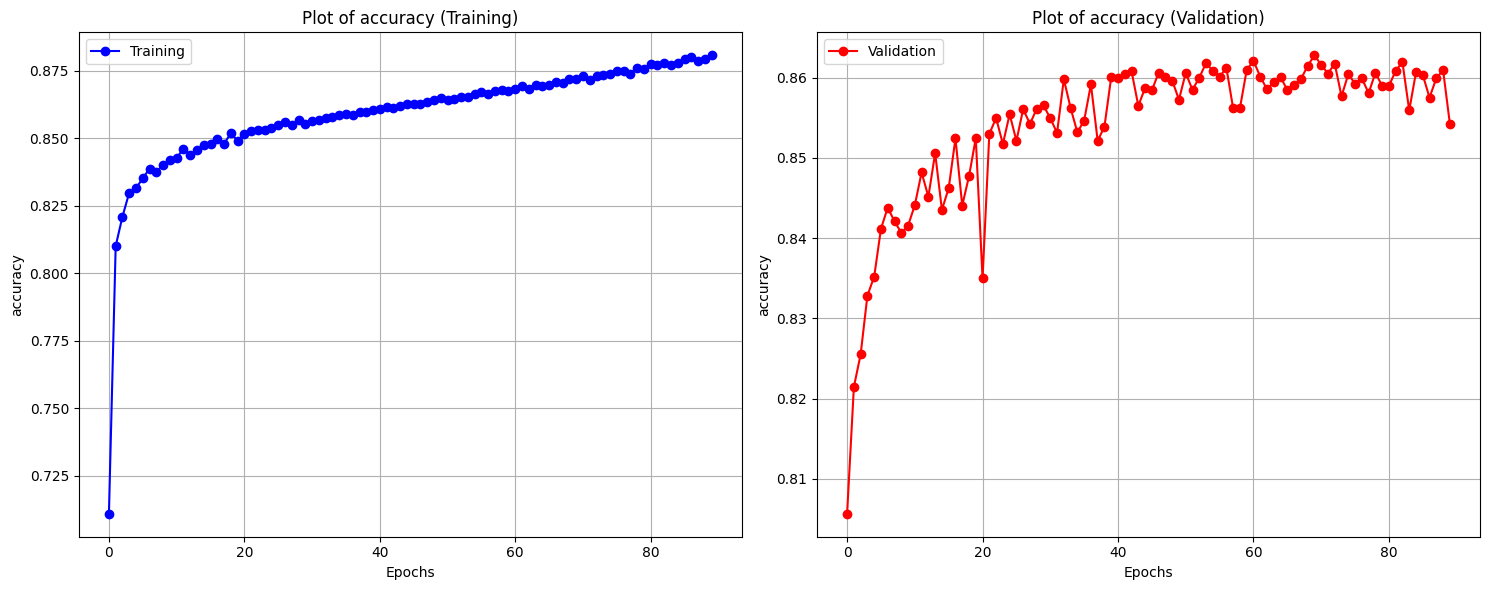

2023-10-13 18:26:24.898785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


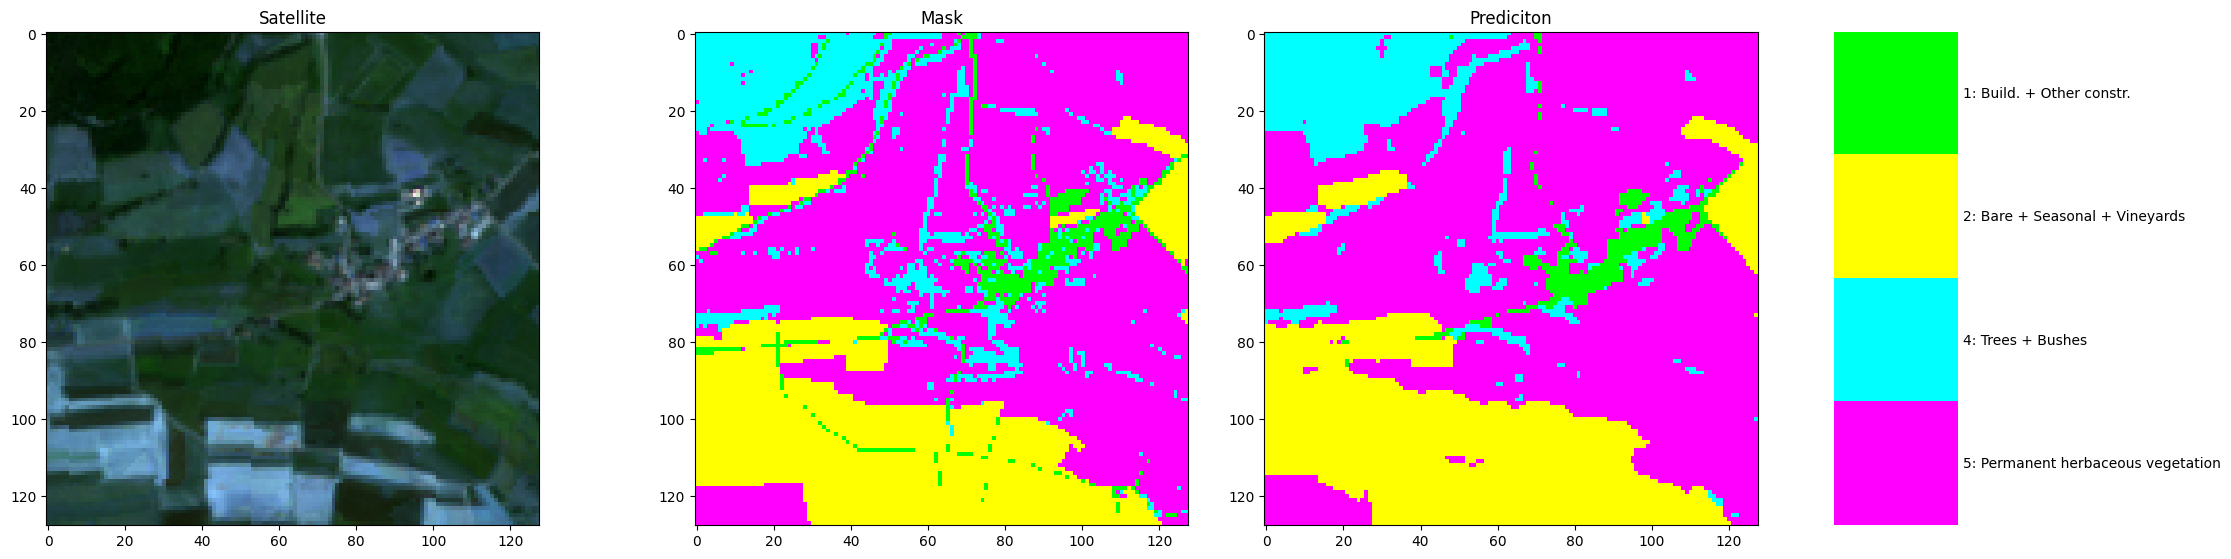

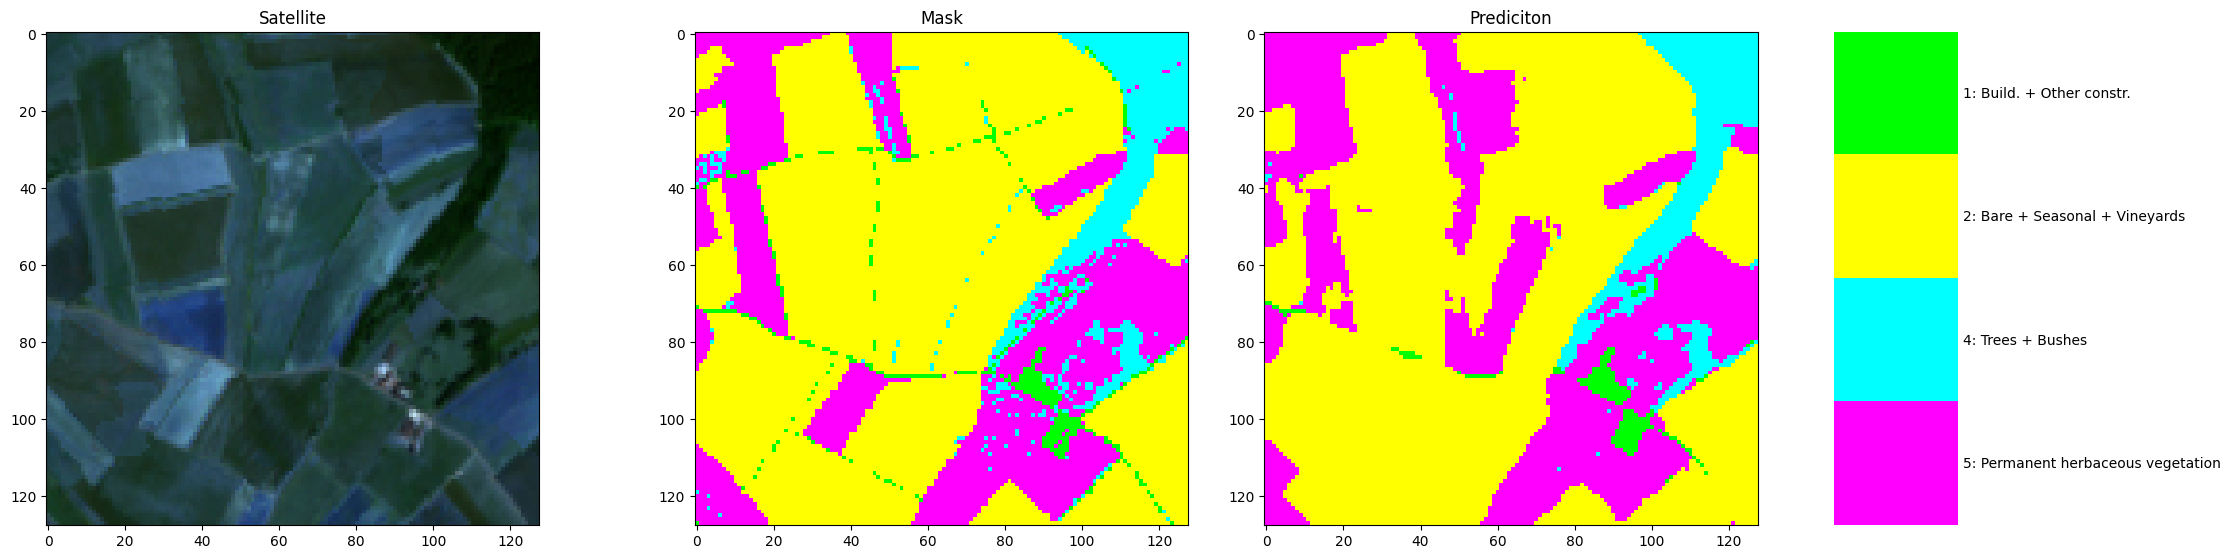

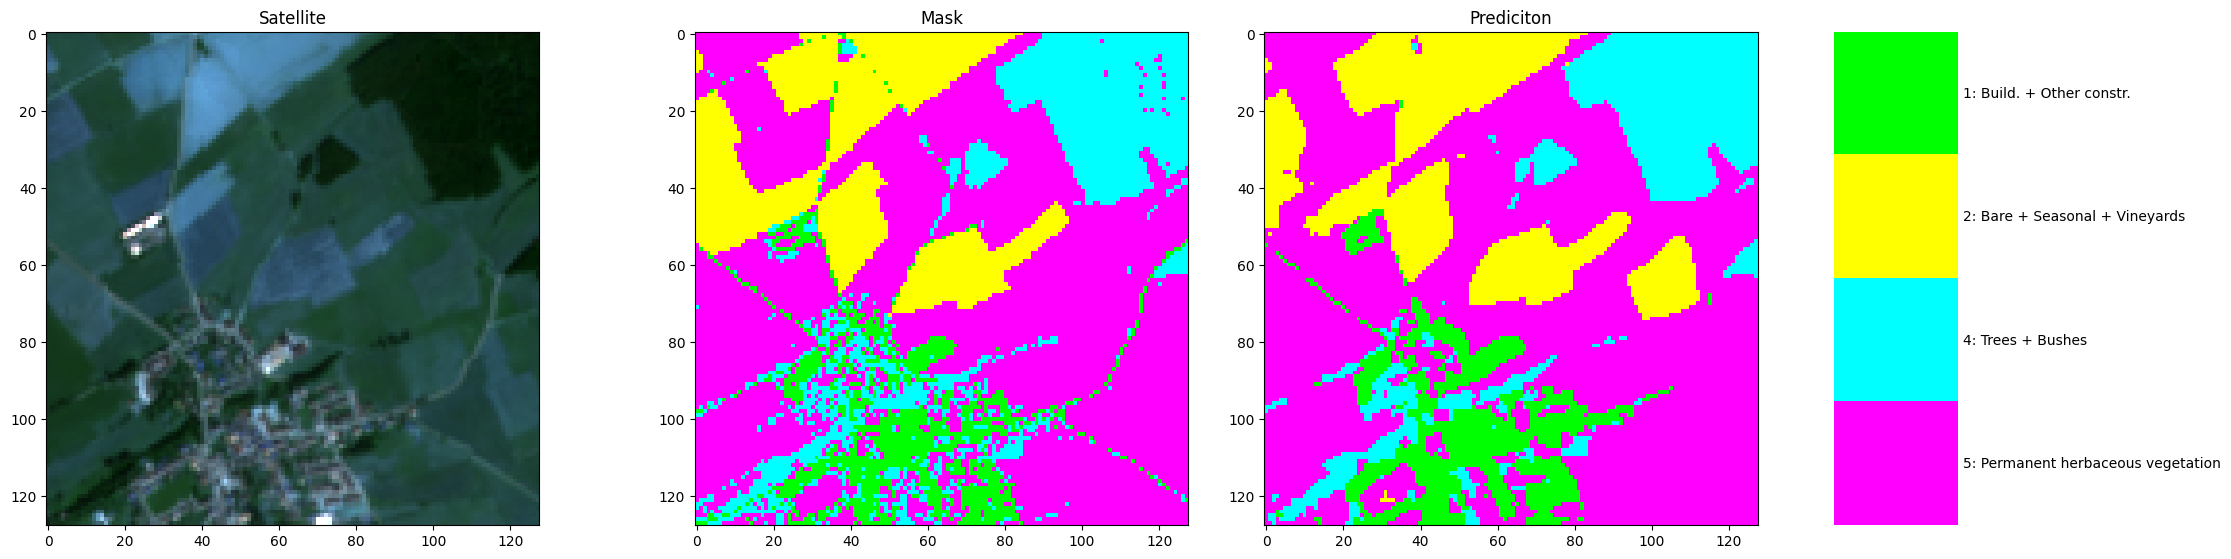

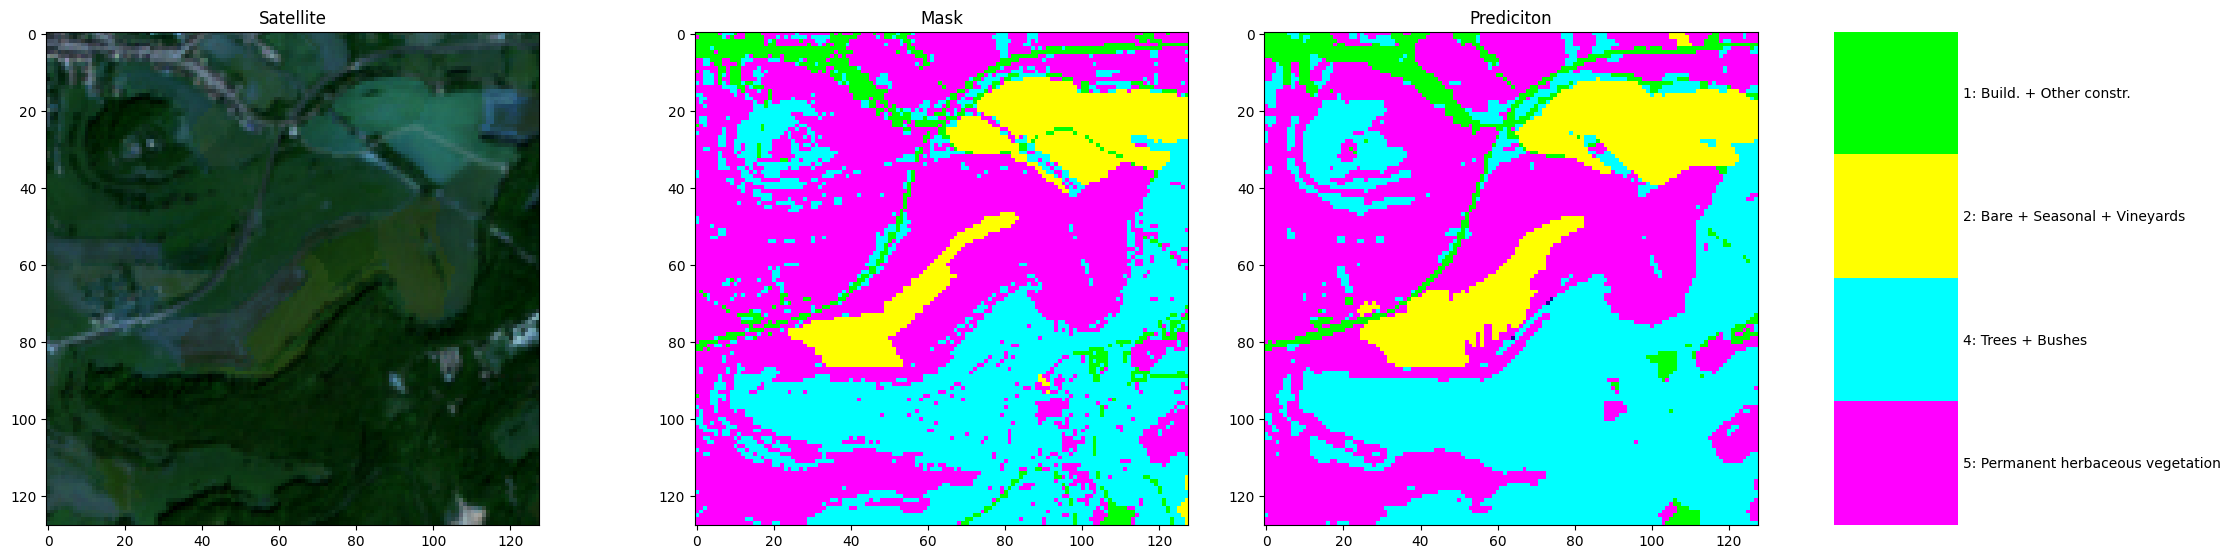

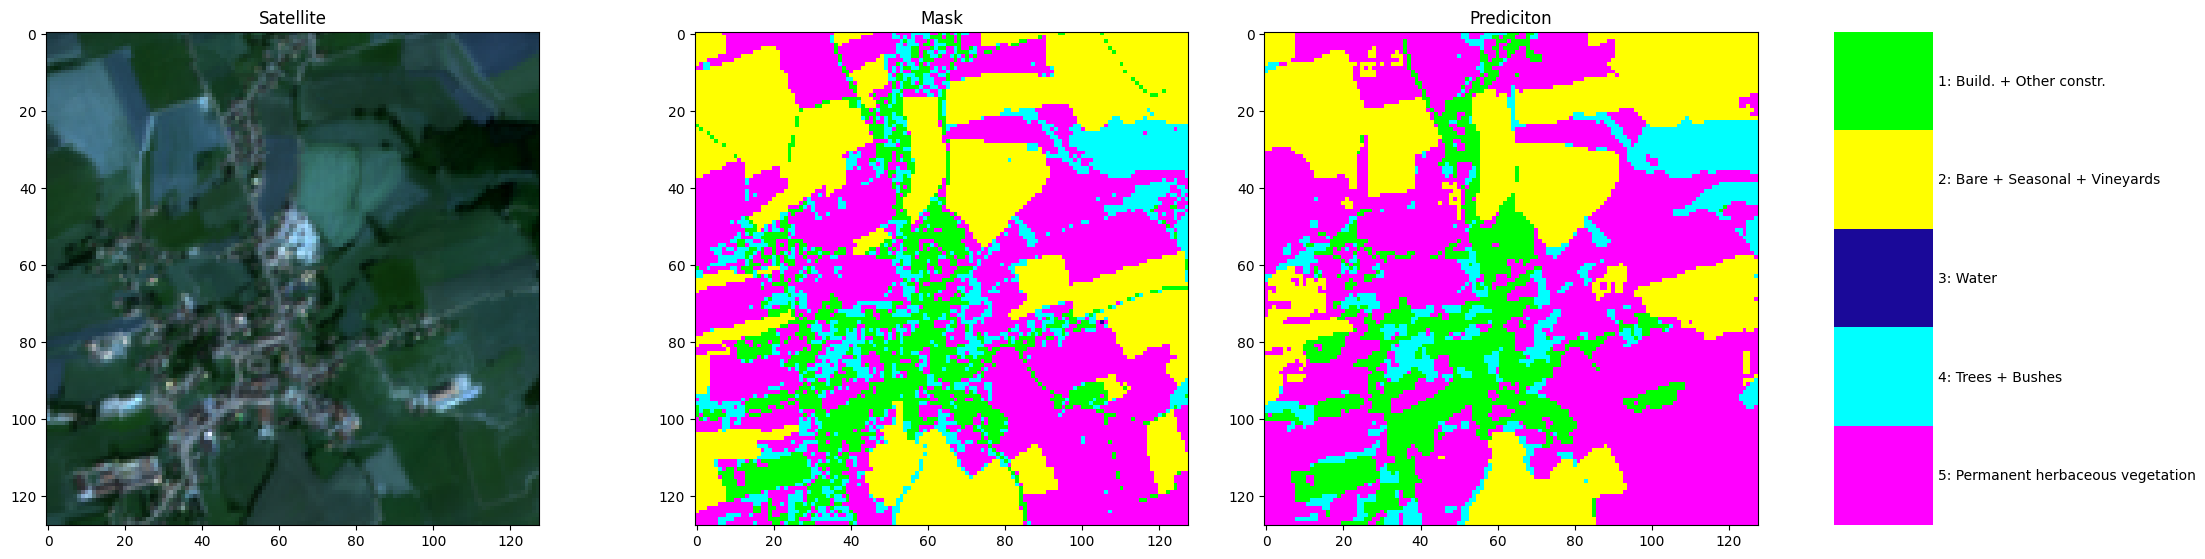

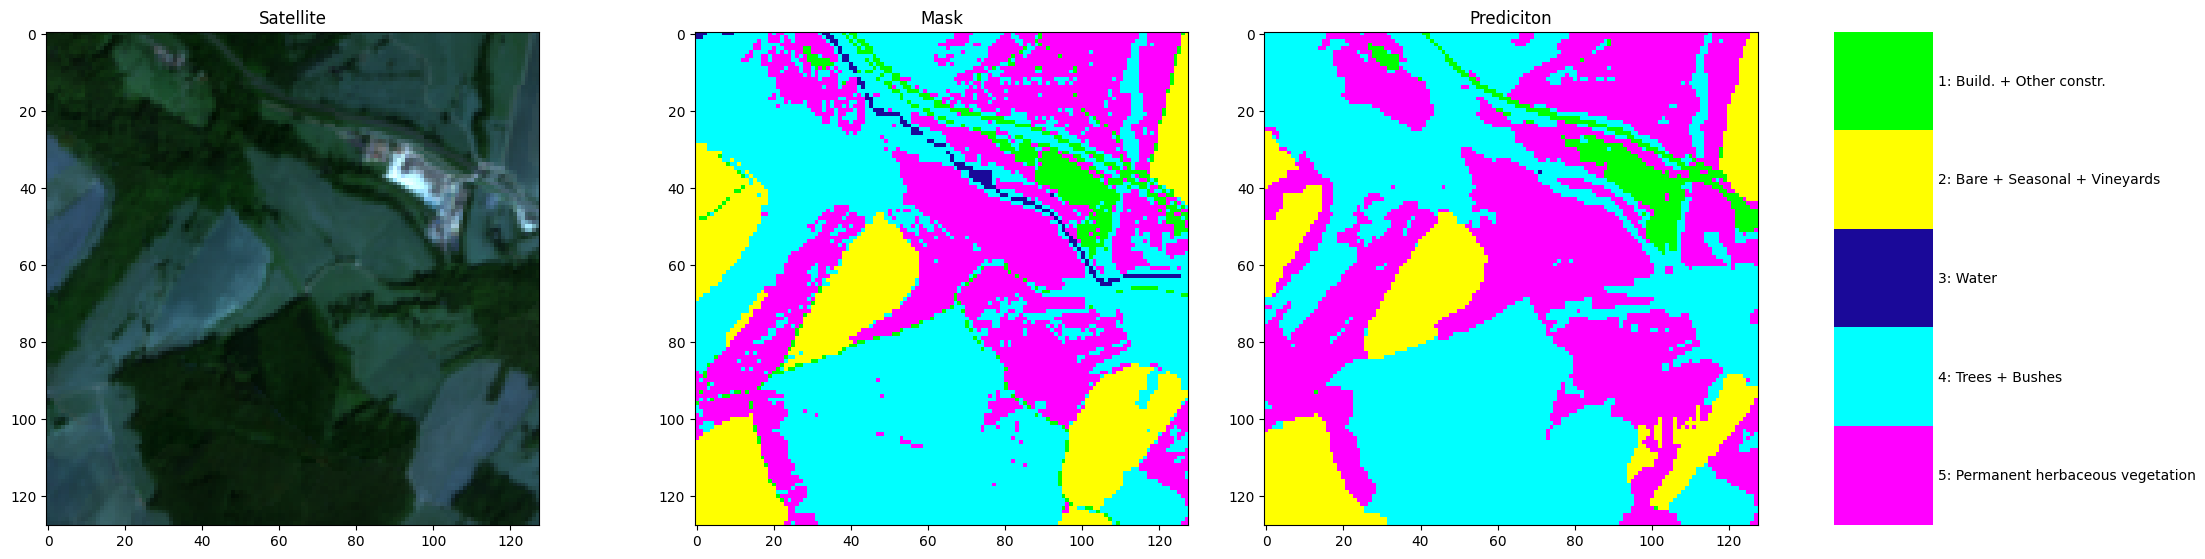

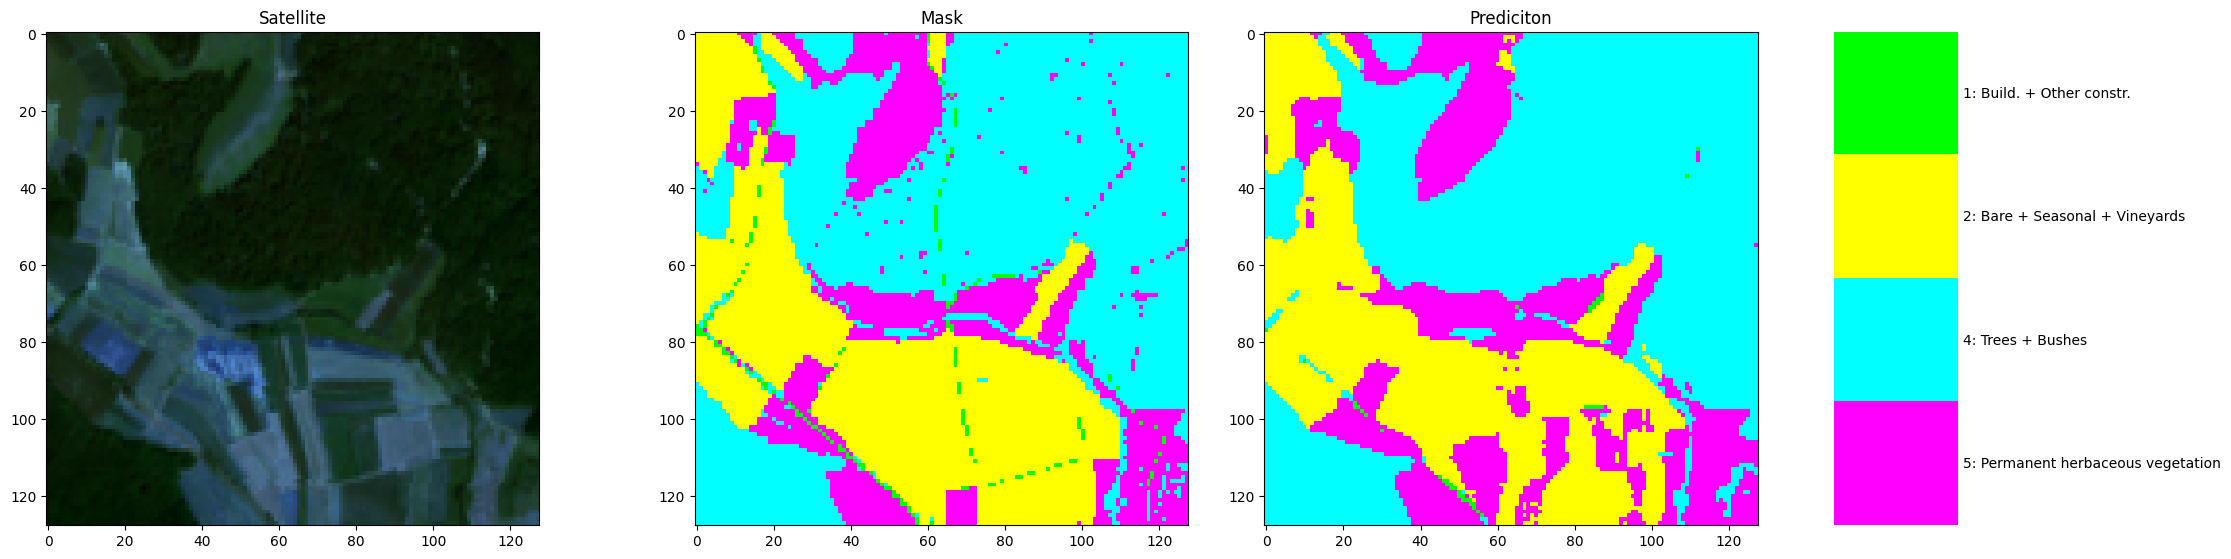

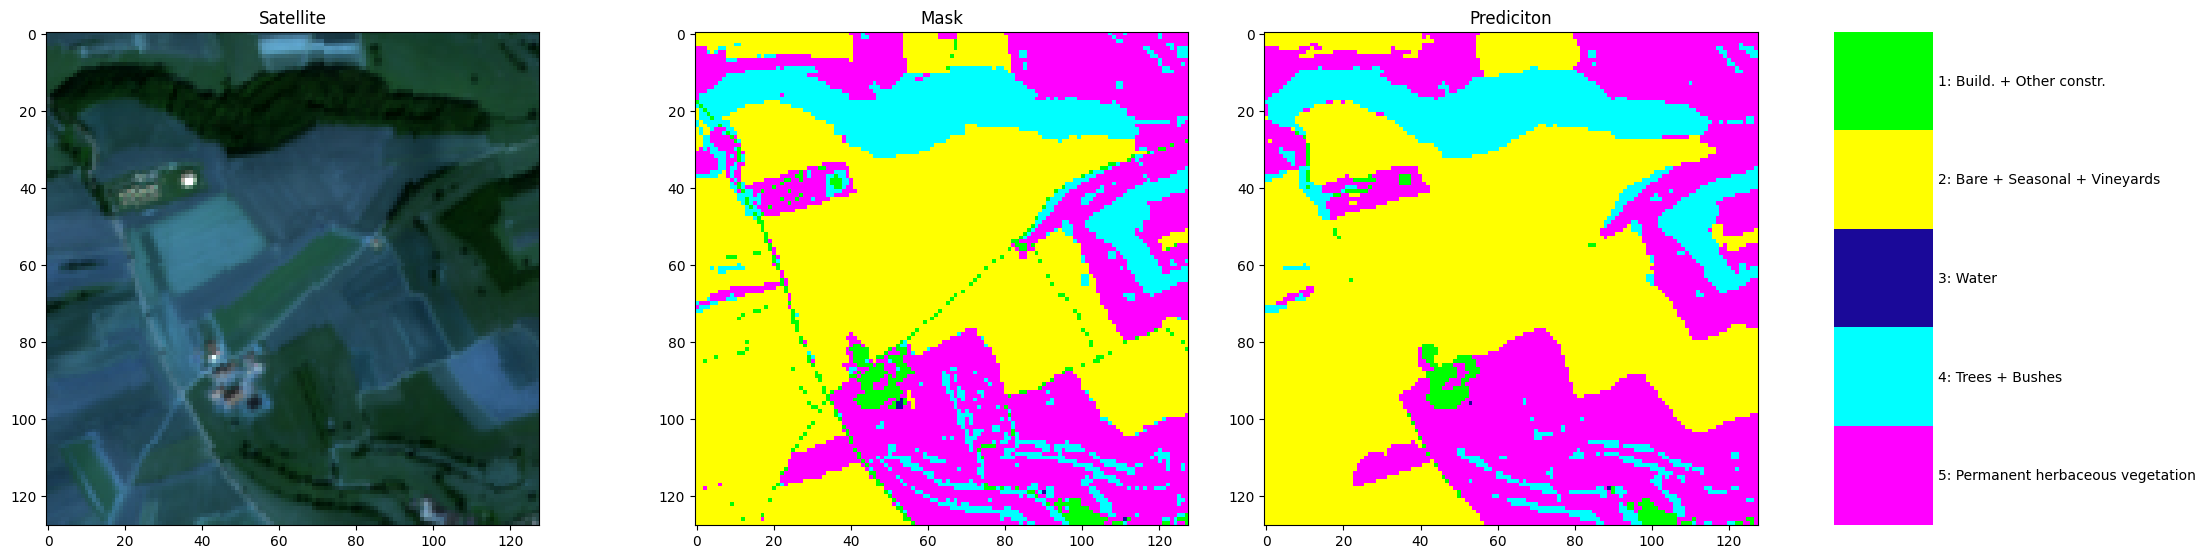

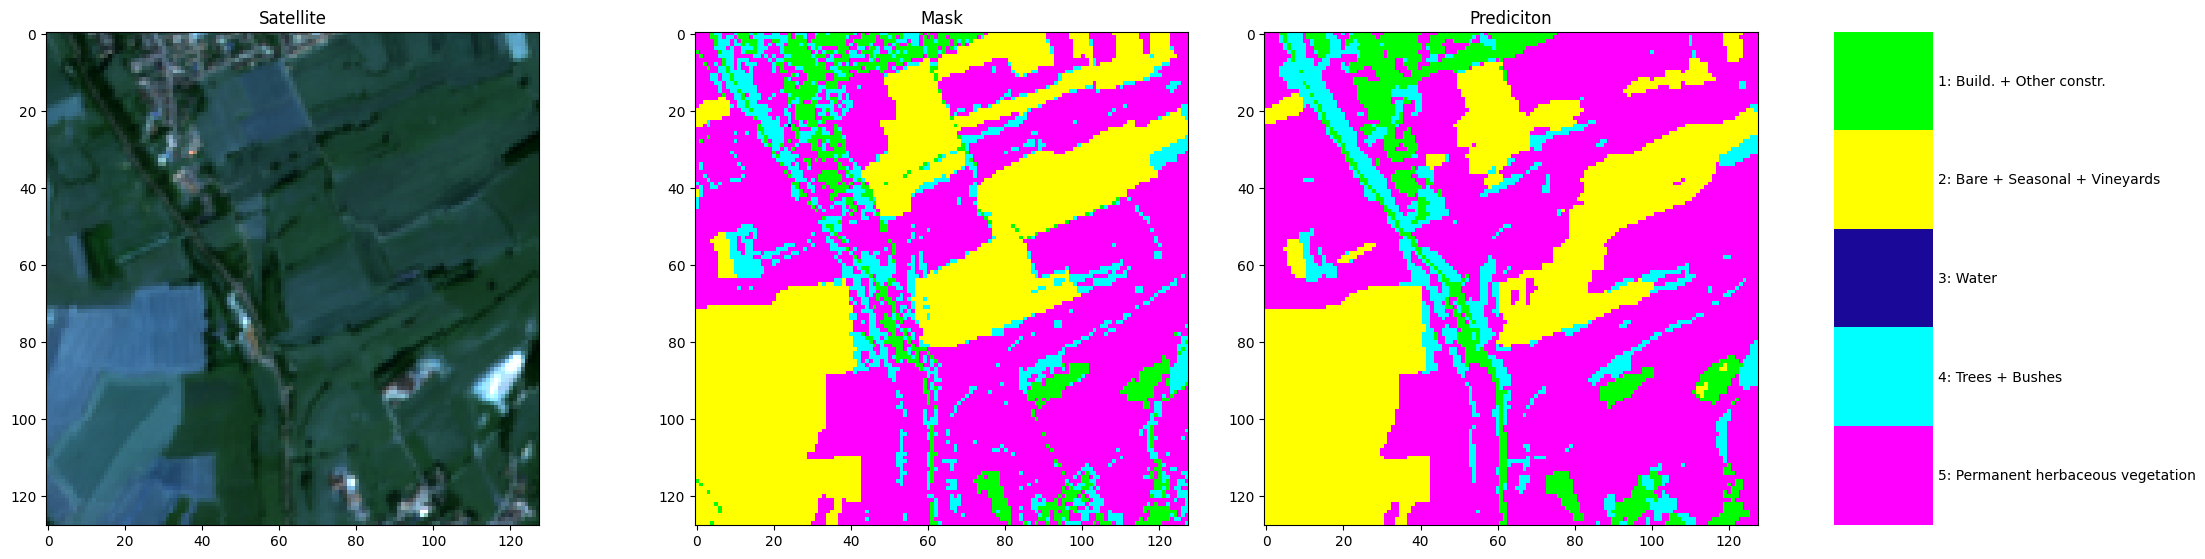

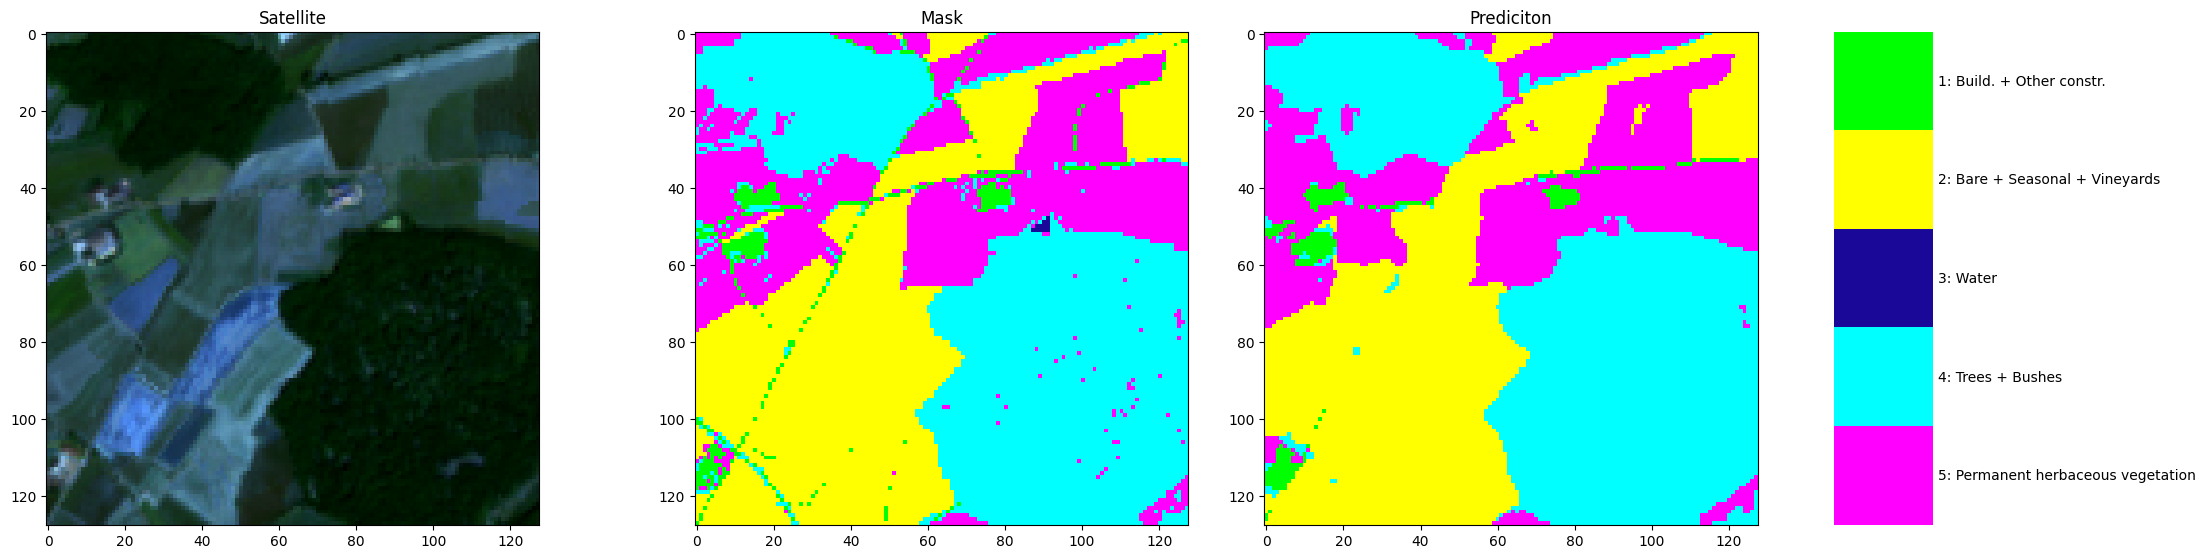

In [8]:
full_report_single_model(processed_image_ds_train, processed_image_ds_val, processed_image_ds_test, best_model, print_loss=True, print_accuracy=True, n_imgs=10, start = 0, print_params = True)